In [ ]:
!pip install numpy pandas gym

In [ ]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
import random

# Mock network load data (simulating traffic patterns for training)
np.random.seed(42)
network_load_data = np.random.randint(1, 100, size=1000)  # Traffic load values between 1 and 100

# Define custom environment for 5G energy optimization
class EnergyOptimizationEnv(gym.Env):
    def __init__(self):
        super(EnergyOptimizationEnv, self).__init__()
        self.action_space = spaces.Discrete(2)  # 0 = Normal Mode, 1 = Power-Saving Mode
        self.observation_space = spaces.Box(low=1, high=100, shape=(1,), dtype=np.int32)
        self.current_step = 0
        self.total_energy_consumption = 0
        self.energy_consumed_normal = 10  # Energy in normal mode
        self.energy_consumed_power_save = 3  # Energy in power-saving mode

    def reset(self):
        self.current_step = 0
        self.total_energy_consumption = 0
        return [network_load_data[self.current_step]]

    def step(self, action):
        load = network_load_data[self.current_step]
        if action == 1 and load < 20:  # Power-saving mode if load is low
            energy_used = self.energy_consumed_power_save
            reward = 10  # Positive reward for saving energy
        else:
            energy_used = self.energy_consumed_normal
            reward = -1 if load > 80 and action == 1 else 0  # Penalty if high load in power-saving

        self.total_energy_consumption += energy_used
        self.current_step += 1
        done = self.current_step >= len(network_load_data) - 1
        next_state = [network_load_data[self.current_step]] if not done else [0]

        return next_state, reward, done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Total Energy Consumption: {self.total_energy_consumption}")

# Q-learning algorithm
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.95, epsilon=1.0, epsilon_decay=0.995):
    q_table = np.zeros((101, env.action_space.n))  # State-action values
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            state_idx = state[0]
            if random.uniform(0, 1) < epsilon:  # Epsilon-greedy strategy
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state_idx])

            next_state, reward, done, _ = env.step(action)
            next_state_idx = next_state[0]
            q_value = q_table[state_idx, action]
            best_next_q = np.max(q_table[next_state_idx])

            # Update Q-value
            q_table[state_idx, action] = (1 - alpha) * q_value + alpha * (reward + gamma * best_next_q)

            state = next_state

        epsilon *= epsilon_decay  # Decay epsilon after each episode

    return q_table

# Train and evaluate the model
env = EnergyOptimizationEnv()
q_table = q_learning(env)
print("Training complete. Q-table values:")
print(q_table)

# Test trained model
state = env.reset()
done = False
while not done:
    state_idx = state[0]
    action = np.argmax(q_table[state_idx])
    state, reward, done, _ = env.step(action)
    env.render()


Training complete. Q-table values:
[[ 0.          0.        ]
 [41.92295849 51.67878507]
 [40.04159834 49.21229938]
 [40.45347557 48.80267449]
 [41.61796077 51.00338096]
 [38.74590756 49.28368656]
 [37.24667149 46.78021411]
 [41.29028718 50.73118741]
 [38.29984042 49.0690795 ]
 [37.44585373 47.65770469]
 [37.60571874 48.74419632]
 [40.24562749 48.93157193]
 [38.5344863  47.89837231]
 [37.89627858 47.59194518]
 [40.63470941 48.99556854]
 [37.03995999 47.49948624]
 [38.9785378  49.12098644]
 [37.28365219 48.16816302]
 [38.77373157 48.12063324]
 [39.5769333  48.34611939]
 [37.7908105  38.37777061]
 [39.08652963 38.15586432]
 [36.96287494 36.7639931 ]
 [39.1121684  40.46174245]
 [38.42610036 39.18573651]
 [38.51852797 36.8026745 ]
 [38.4534814  39.43936877]
 [37.82984537 39.15908908]
 [38.35185219 37.81852908]
 [41.99048365 40.88242567]
 [38.73562564 40.12588736]
 [44.14351212 42.02271238]
 [37.02077402 37.30509295]
 [37.48896288 36.72767193]
 [38.74167803 40.53922681]
 [38.02814356 37.180

In [ ]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
import random

# Mock data simulating network latency and traffic load
np.random.seed(42)
network_latency_data = np.random.randint(1, 50, size=(1000,))  # Latency values between 1 and 50 ms

# Custom environment for latency optimization in 5G
class LatencyOptimizationEnv(gym.Env):
    def __init__(self):
        super(LatencyOptimizationEnv, self).__init__()
        self.action_space = spaces.Discrete(2)  # 0 = Route A, 1 = Route B
        self.observation_space = spaces.Box(low=1, high=50, shape=(1,), dtype=np.int32)
        self.current_step = 0
        self.total_latency = 0

    def reset(self):
        self.current_step = 0
        self.total_latency = 0
        return [network_latency_data[self.current_step]]

    def step(self, action):
        latency = network_latency_data[self.current_step]

        # Simulating latency on different routes
        if action == 1 and latency > 25:  # Prefer route B if latency on route A is high
            optimized_latency = latency - 10  # Reduced latency on route B
            reward = 10  # Positive reward for choosing low-latency route
        else:
            optimized_latency = latency
            reward = -1 if latency > 40 and action == 0 else 0  # Penalty if high latency on route A

        self.total_latency += optimized_latency
        self.current_step += 1
        done = self.current_step >= len(network_latency_data) - 1
        next_state = [network_latency_data[self.current_step]] if not done else [0]

        return next_state, reward, done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Total Latency: {self.total_latency}")

# Q-learning algorithm for latency optimization
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.95, epsilon=1.0, epsilon_decay=0.995):
    q_table = np.zeros((51, env.action_space.n))  # State-action values for latency from 1 to 50 ms
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            state_idx = state[0]
            if random.uniform(0, 1) < epsilon:  # Epsilon-greedy strategy
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state_idx])

            next_state, reward, done, _ = env.step(action)
            next_state_idx = next_state[0]
            q_value = q_table[state_idx, action]
            best_next_q = np.max(q_table[next_state_idx])

            # Update Q-value
            q_table[state_idx, action] = (1 - alpha) * q_value + alpha * (reward + gamma * best_next_q)

            state = next_state

        epsilon *= epsilon_decay  # Decay epsilon after each episode

    return q_table

# Train and evaluate the model
env = LatencyOptimizationEnv()
q_table = q_learning(env)
print("Training complete. Q-table values:")
print(q_table)

# Test trained model
state = env.reset()
done = False
while not done:
    state_idx = state[0]
    action = np.argmax(q_table[state_idx])
    state, reward, done, _ = env.step(action)
    env.render()


Training complete. Q-table values:
[[  0.           0.        ]
 [ 93.87893717  92.33709279]
 [ 92.48275042  94.99719156]
 [ 94.61724328  91.90890688]
 [ 93.44640525  94.51135341]
 [ 98.41063716  97.12890172]
 [ 94.61075613  95.45249595]
 [ 93.32674972  92.2705363 ]
 [ 97.11424627  94.35356981]
 [ 95.24118648  93.8710966 ]
 [ 94.923199    94.27834659]
 [ 95.30776371  93.34850309]
 [ 92.44528538  93.18517442]
 [ 94.24884553  95.70323499]
 [ 92.77729265  91.35689089]
 [ 97.11232869  97.54103034]
 [ 93.88257671  92.76799139]
 [ 94.09646441  95.05685782]
 [ 97.49770176  96.49049098]
 [ 91.2710244   94.62060398]
 [ 92.97248456  93.06543977]
 [ 93.6628994   93.64034843]
 [ 93.13728305  94.56499952]
 [ 91.85417161  93.37666316]
 [ 93.53467066  93.40136967]
 [ 93.41651605  92.46105979]
 [ 94.88958059 106.39550212]
 [ 94.66067105 105.13219244]
 [ 94.01655317 104.39748136]
 [ 95.55779865 105.28112638]
 [ 95.9970241  106.10011802]
 [ 85.35651608  90.41418951]
 [ 93.65651933 103.86490603]
 [ 94.78

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_visualization(env, q_table):
    # Prepare figure with subplots
    plt.figure(figsize=(20, 15))
    plt.suptitle('Latency Optimization Q-Learning Analysis', fontsize=16)

    # 1. Original Latency Distribution
    plt.subplot(2, 3, 1)
    plt.hist(network_latency_data, bins=20, edgecolor='black')
    plt.title('Original Network Latency Distribution')
    plt.xlabel('Latency (ms)')
    plt.ylabel('Frequency')

    # 2. Q-Table Heatmap
    plt.subplot(2, 3, 2)
    sns.heatmap(q_table, cmap='YlGnBu', annot=False)
    plt.title('Q-Table Heatmap')
    plt.xlabel('Actions (Route A/B)')
    plt.ylabel('Latency States')

    # 3. Q-Values for Different Latency Levels
    plt.subplot(2, 3, 3)
    plt.plot(q_table[:, 0], label='Route A Q-Values', alpha=0.7)
    plt.plot(q_table[:, 1], label='Route B Q-Values', alpha=0.7)
    plt.title('Q-Values by Latency State')
    plt.xlabel('Latency State')
    plt.ylabel('Q-Value')
    plt.legend()

    # 4. Comparative Route Performance Simulation
    route_a_latencies = []
    route_b_latencies = []

    state = env.reset()
    done = False
    while not done:
        state_idx = state[0]
        action = np.argmax(q_table[state_idx])
        state, reward, done, _ = env.step(action)

        if action == 0:
            route_a_latencies.append(state[0])
        else:
            route_b_latencies.append(state[0])

    plt.subplot(2, 3, 4)
    plt.boxplot([route_a_latencies, route_b_latencies], labels=['Route A', 'Route B'])
    plt.title('Latency Distribution by Route')
    plt.ylabel('Latency (ms)')

    # 5. Reward Distribution
    plt.subplot(2, 3, 5)
    rewards = []
    env.reset()
    done = False
    while not done:
        state = env.reset()
        state_idx = state[0]
        action = np.argmax(q_table[state_idx])
        _, reward, done, _ = env.step(action)
        rewards.append(reward)

    plt.hist(rewards, bins=10, edgecolor='black')
    plt.title('Reward Distribution')
    plt.xlabel('Reward')
    plt.ylabel('Frequency')

    # 6. Action Selection Probability
    plt.subplot(2, 3, 6)
    action_counts = {0: 0, 1: 0}
    env.reset()
    done = False
    total_steps = 0
    while not done:
        state = env.reset()
        state_idx = state[0]
        action = np.argmax(q_table[state_idx])
        action_counts[action] += 1
        total_steps += 1
        _, _, done, _ = env.step(action)

    plt.pie(action_counts.values(), labels=['Route A', 'Route B'],
            autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    plt.title('Route Selection Probability')

    plt.tight_layout()
    plt.show()

# Regenerate the environment and Q-table
env = LatencyOptimizationEnv()
q_table = q_learning(env)

# Generate visualizations
generate_visualization(env, q_table)

Episode 0: Total Reward = 2356, Epsilon = 0.9950
Episode 100: Total Reward = 3519, Epsilon = 0.6027
Episode 200: Total Reward = 4044, Epsilon = 0.3651
Episode 300: Total Reward = 4468, Epsilon = 0.2212
Episode 400: Total Reward = 4758, Epsilon = 0.1340
Episode 500: Total Reward = 4872, Epsilon = 0.0812
Episode 600: Total Reward = 4977, Epsilon = 0.0492
Episode 700: Total Reward = 5038, Epsilon = 0.0298
Episode 800: Total Reward = 5037, Epsilon = 0.0180
Episode 900: Total Reward = 5029, Epsilon = 0.0109


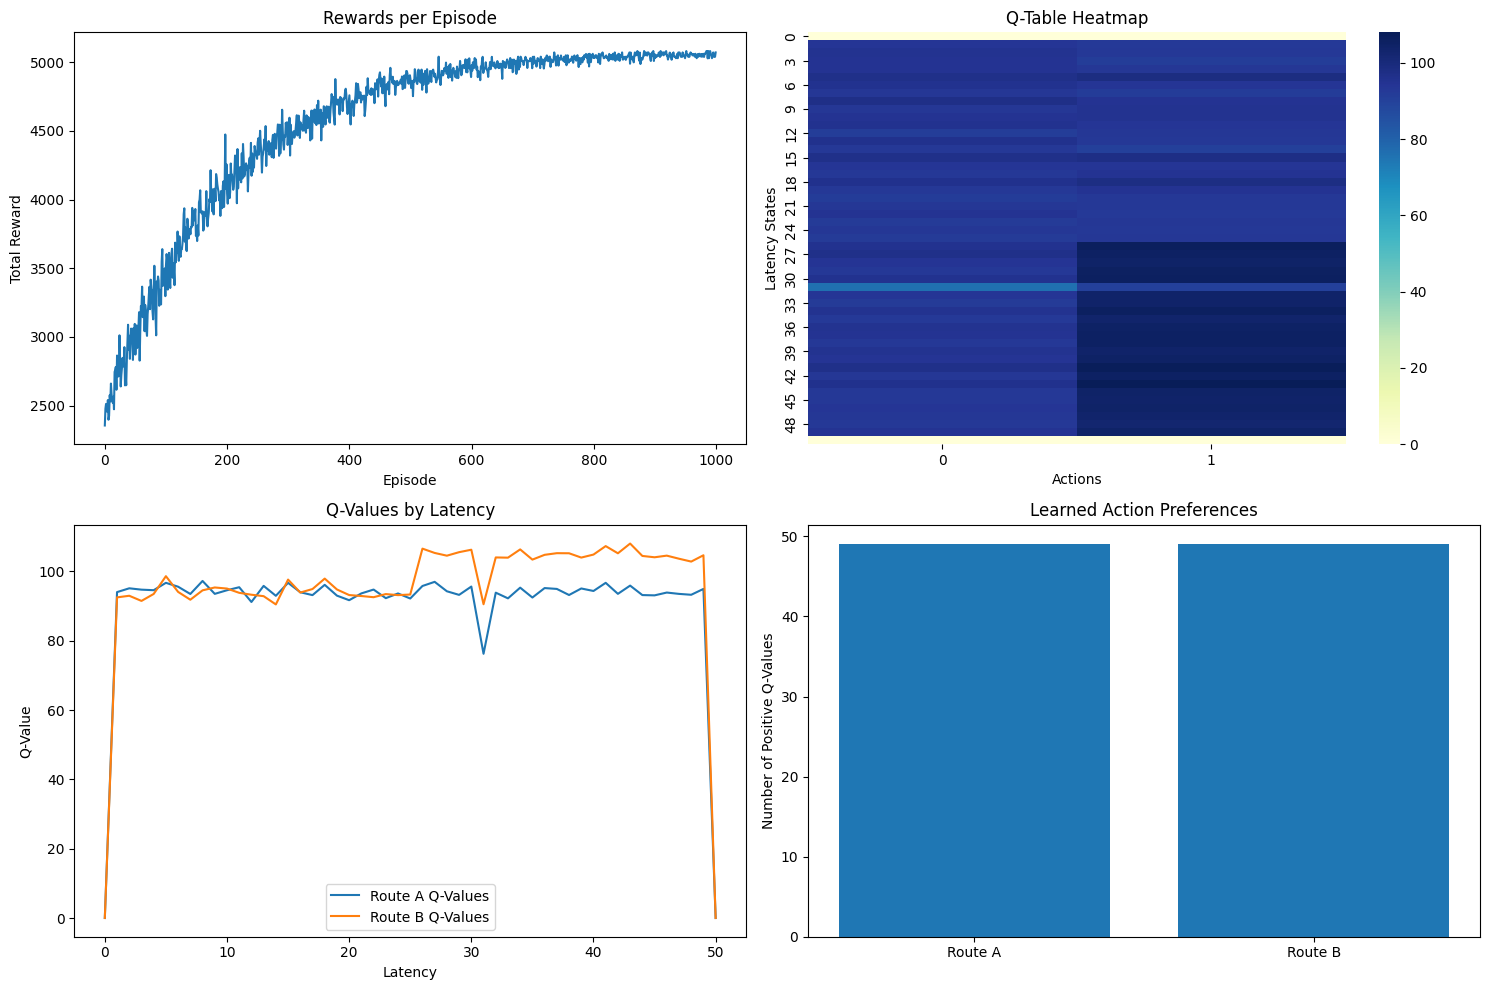


Demonstrating Learned Policy:
State: 39, Action: Route B, Reward: 10
State: 29, Action: Route B, Reward: 10
State: 15, Action: Route B, Reward: 0
State: 43, Action: Route B, Reward: 10
State: 8, Action: Route A, Reward: 0
State: 21, Action: Route A, Reward: 0
State: 39, Action: Route B, Reward: 10
State: 19, Action: Route B, Reward: 0
State: 23, Action: Route B, Reward: 0
State: 11, Action: Route A, Reward: 0
State: 11, Action: Route A, Reward: 0
State: 24, Action: Route A, Reward: 0
State: 36, Action: Route B, Reward: 10
State: 40, Action: Route B, Reward: 10
State: 24, Action: Route A, Reward: 0
State: 3, Action: Route A, Reward: 0
State: 22, Action: Route A, Reward: 0
State: 2, Action: Route A, Reward: 0
State: 24, Action: Route A, Reward: 0
State: 44, Action: Route B, Reward: 10
State: 30, Action: Route B, Reward: 10
State: 38, Action: Route B, Reward: 10
State: 2, Action: Route A, Reward: 0
State: 21, Action: Route A, Reward: 0
State: 33, Action: Route B, Reward: 10
State: 12, Ac

In [ ]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Mock data simulating network latency and traffic load
network_latency_data = np.random.randint(1, 50, size=(1000,))  # Latency values between 1 and 50 ms

class LatencyOptimizationEnv(gym.Env):
    def __init__(self, latency_data):
        super(LatencyOptimizationEnv, self).__init__()
        self.latency_data = latency_data
        self.action_space = spaces.Discrete(2)  # 0 = Route A, 1 = Route B
        self.observation_space = spaces.Box(low=1, high=50, shape=(1,), dtype=np.int32)
        self.reset()

    def reset(self):
        self.current_step = 0
        self.total_latency = 0
        self.episode_rewards = []
        return np.array([self.latency_data[self.current_step]])

    def step(self, action):
        if self.current_step >= len(self.latency_data):
            return np.array([0]), 0, True, {}

        latency = self.latency_data[self.current_step]

        # Simulating latency on different routes with more nuanced logic
        if action == 1 and latency > 25:  # Prefer route B if latency on route A is high
            optimized_latency = max(1, latency - 10)  # Reduced latency on route B, ensure positive
            reward = 10  # Positive reward for choosing low-latency route
        else:
            optimized_latency = latency
            reward = -1 if latency > 40 else 0  # Penalty for high latency

        self.total_latency += optimized_latency
        self.episode_rewards.append(reward)
        self.current_step += 1

        done = self.current_step >= len(self.latency_data) - 1
        next_state = np.array([self.latency_data[self.current_step]]) if not done else np.array([0])

        return next_state, reward, done, {}

def q_learning(env, episodes=1000, alpha=0.1, gamma=0.95, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995):
    # Increase state space to handle all possible latency values
    q_table = np.zeros((51, env.action_space.n))
    episode_rewards_history = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        total_episode_reward = 0

        while not done:
            state_idx = int(state[0])

            # Epsilon-greedy action selection
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state_idx])

            next_state, reward, done, _ = env.step(action)
            next_state_idx = int(next_state[0])

            total_episode_reward += reward

            # Q-value update
            best_next_action = np.argmax(q_table[next_state_idx])
            td_target = reward + gamma * q_table[next_state_idx][best_next_action]
            td_error = td_target - q_table[state_idx][action]
            q_table[state_idx][action] += alpha * td_error

            state = next_state

        # Decay epsilon
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        episode_rewards_history.append(total_episode_reward)

        # Print progress
        if episode % 100 == 0:
            print(f"Episode {episode}: Total Reward = {total_episode_reward}, Epsilon = {epsilon:.4f}")

    return q_table, episode_rewards_history

def visualize_results(q_table, episode_rewards):
    plt.figure(figsize=(15, 10))

    # Rewards over episodes
    plt.subplot(2, 2, 1)
    plt.plot(episode_rewards)
    plt.title('Rewards per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')

    # Q-table heatmap
    plt.subplot(2, 2, 2)
    sns.heatmap(q_table, cmap='YlGnBu', annot=False)
    plt.title('Q-Table Heatmap')
    plt.xlabel('Actions')
    plt.ylabel('Latency States')

    # Q-values for each action
    plt.subplot(2, 2, 3)
    plt.plot(q_table[:, 0], label='Route A Q-Values')
    plt.plot(q_table[:, 1], label='Route B Q-Values')
    plt.title('Q-Values by Latency')
    plt.xlabel('Latency')
    plt.ylabel('Q-Value')
    plt.legend()

    # Action distribution
    plt.subplot(2, 2, 4)
    action_counts = np.sum(q_table > 0, axis=0)
    plt.bar(['Route A', 'Route B'], action_counts)
    plt.title('Learned Action Preferences')
    plt.ylabel('Number of Positive Q-Values')

    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # Create environment
    env = LatencyOptimizationEnv(network_latency_data)

    # Run Q-learning
    q_table, episode_rewards = q_learning(env)

    # Visualize results
    visualize_results(q_table, episode_rewards)

    # Demonstration of learned policy
    print("\nDemonstrating Learned Policy:")
    state = env.reset()
    done = False
    total_test_reward = 0

    while not done:
        state_idx = int(state[0])
        action = np.argmax(q_table[state_idx])
        state, reward, done, _ = env.step(action)
        total_test_reward += reward
        print(f"State: {state_idx}, Action: {'Route A' if action == 0 else 'Route B'}, Reward: {reward}")

    print(f"\nTotal Test Reward: {total_test_reward}")

if __name__ == "__main__":
    main()

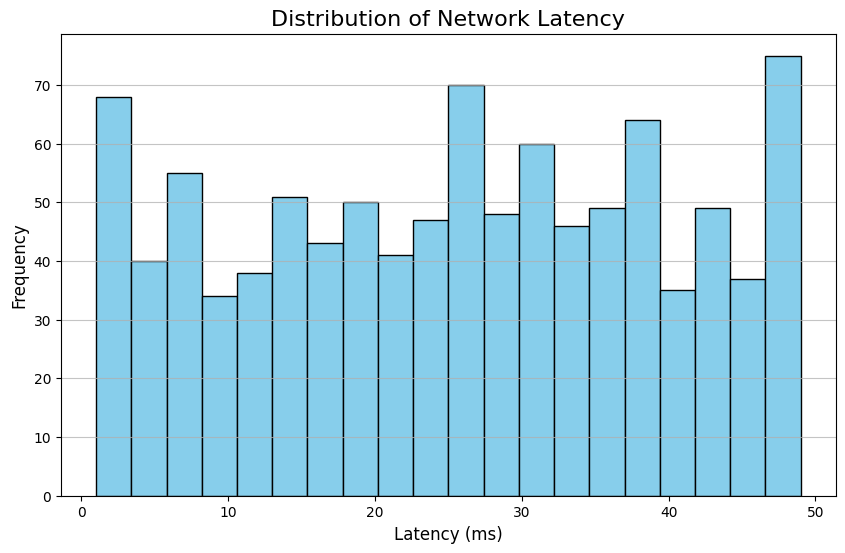

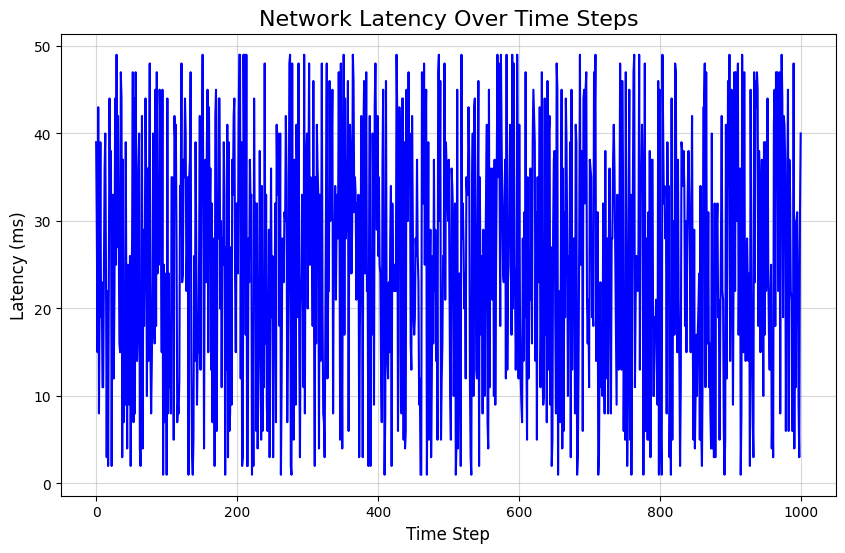

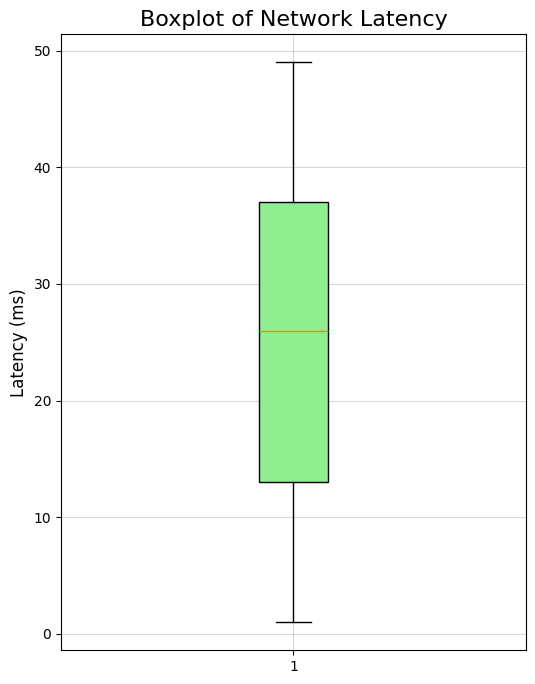

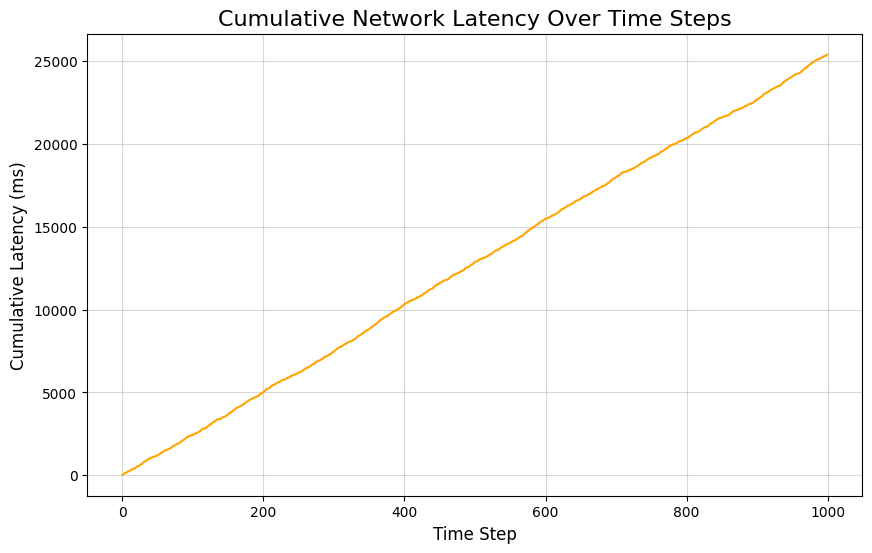

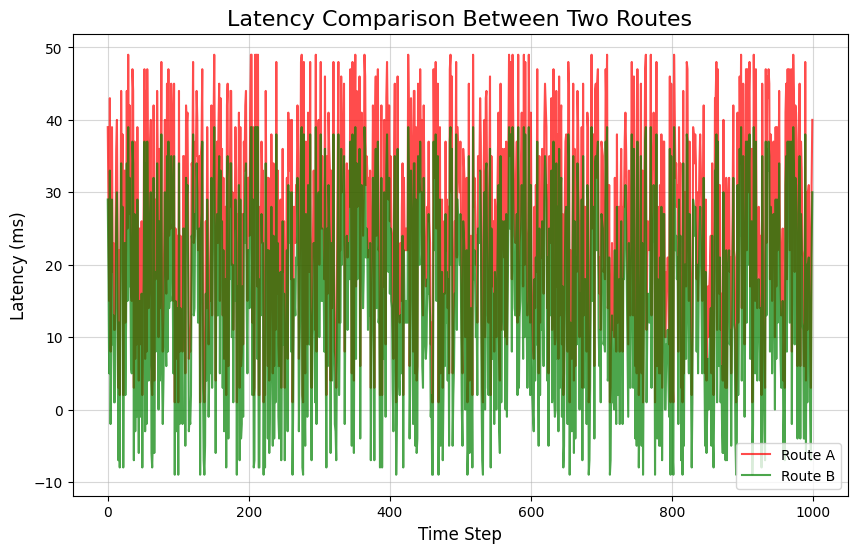

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mock data simulating network latency and traffic load
np.random.seed(42)
network_latency_data = np.random.randint(1, 50, size=(1000,))

# Create some graphs related to the above code

# 1. Distribution of Network Latency
plt.figure(figsize=(10, 6))
plt.hist(network_latency_data, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Network Latency", fontsize=16)
plt.xlabel("Latency (ms)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. Line plot of Network Latency over Time Steps
plt.figure(figsize=(10, 6))
plt.plot(network_latency_data, color='blue', linewidth=1.5)
plt.title("Network Latency Over Time Steps", fontsize=16)
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Latency (ms)", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# 3. Boxplot for Network Latency
plt.figure(figsize=(6, 8))
plt.boxplot(network_latency_data, vert=True, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Boxplot of Network Latency", fontsize=16)
plt.ylabel("Latency (ms)", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# 4. Cumulative Latency Over Time
cumulative_latency = np.cumsum(network_latency_data)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_latency, color='orange', linewidth=1.5)
plt.title("Cumulative Network Latency Over Time Steps", fontsize=16)
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Cumulative Latency (ms)", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# 5. Latency Comparison for Two Routes (simulated)
route_a_latency = network_latency_data
route_b_latency = network_latency_data - 10  # Assuming Route B reduces latency by 10 ms

plt.figure(figsize=(10, 6))
plt.plot(route_a_latency, label="Route A", color='red', alpha=0.7)
plt.plot(route_b_latency, label="Route B", color='green', alpha=0.7)
plt.title("Latency Comparison Between Two Routes", fontsize=16)
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Latency (ms)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()


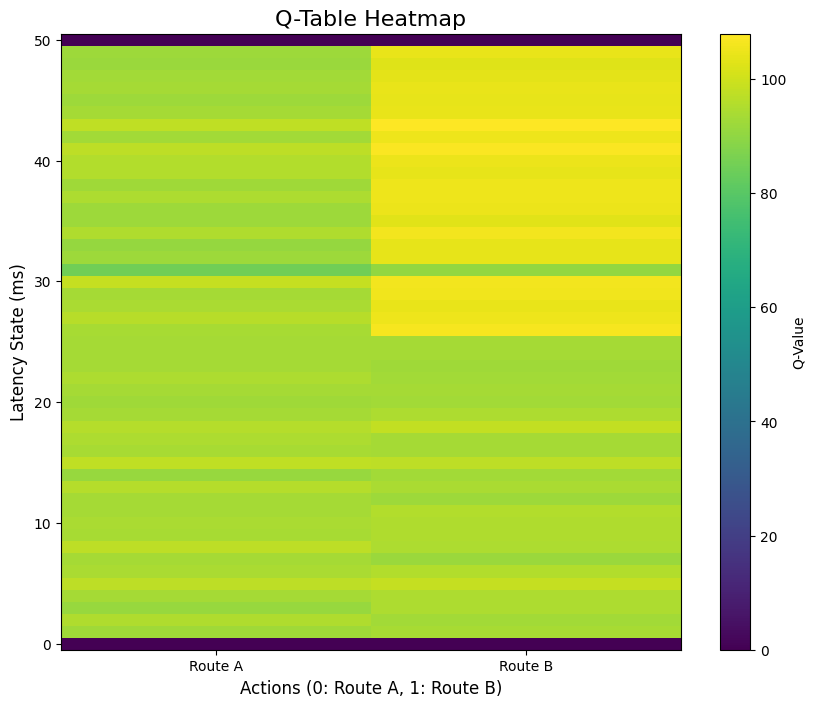

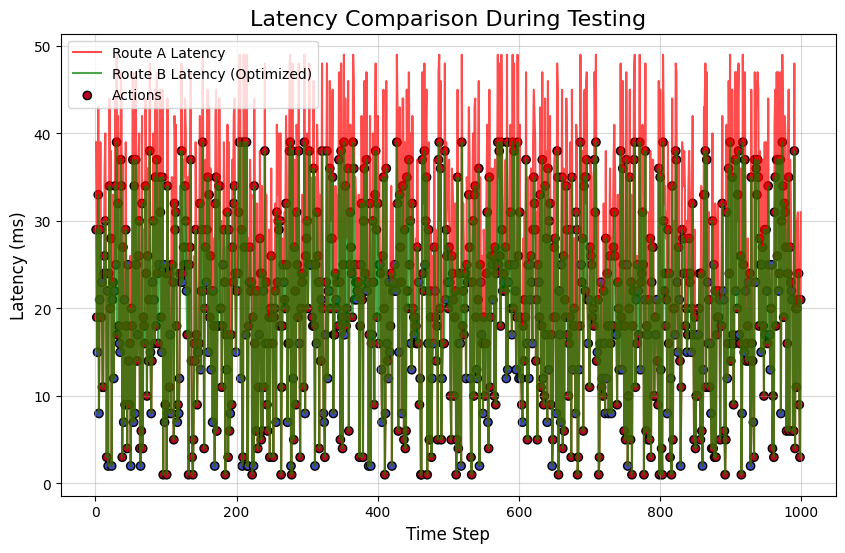

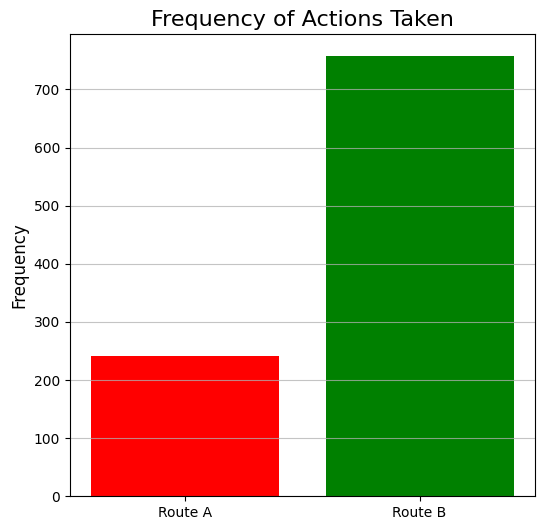

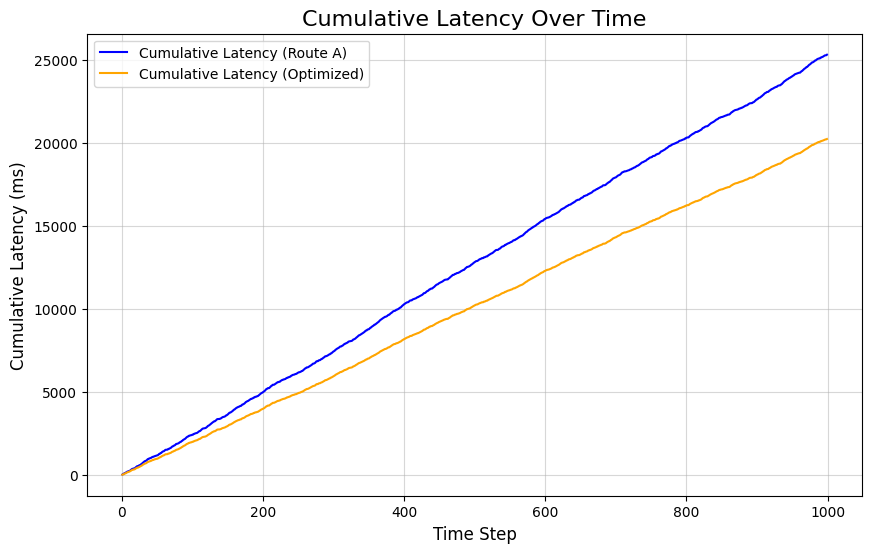

KeyboardInterrupt: 

In [ ]:
# Reintroducing the environment and Q-learning definitions along with data and re-running visualizations.

import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import random

# Mock data simulating network latency and traffic load
np.random.seed(42)
network_latency_data = np.random.randint(1, 50, size=(1000,))  # Latency values between 1 and 50 ms

# Custom environment for latency optimization in 5G
class LatencyOptimizationEnv(gym.Env):
    def __init__(self):
        super(LatencyOptimizationEnv, self).__init__()
        self.action_space = spaces.Discrete(2)  # 0 = Route A, 1 = Route B
        self.observation_space = spaces.Box(low=1, high=50, shape=(1,), dtype=np.int32)
        self.current_step = 0
        self.total_latency = 0

    def reset(self):
        self.current_step = 0
        self.total_latency = 0
        return [network_latency_data[self.current_step]]

    def step(self, action):
        latency = network_latency_data[self.current_step]

        # Simulating latency on different routes
        if action == 1 and latency > 25:  # Prefer route B if latency on route A is high
            optimized_latency = latency - 10  # Reduced latency on route B
            reward = 10  # Positive reward for choosing low-latency route
        else:
            optimized_latency = latency
            reward = -1 if latency > 40 and action == 0 else 0  # Penalty if high latency on route A

        self.total_latency += optimized_latency
        self.current_step += 1
        done = self.current_step >= len(network_latency_data) - 1
        next_state = [network_latency_data[self.current_step]] if not done else [0]

        return next_state, reward, done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Total Latency: {self.total_latency}")

# Q-learning algorithm for latency optimization
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.95, epsilon=1.0, epsilon_decay=0.995):
    q_table = np.zeros((51, env.action_space.n))  # State-action values for latency from 1 to 50 ms
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            state_idx = state[0]
            if random.uniform(0, 1) < epsilon:  # Epsilon-greedy strategy
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state_idx])

            next_state, reward, done, _ = env.step(action)
            next_state_idx = next_state[0]
            q_value = q_table[state_idx, action]
            best_next_q = np.max(q_table[next_state_idx])

            # Update Q-value
            q_table[state_idx, action] = (1 - alpha) * q_value + alpha * (reward + gamma * best_next_q)

            state = next_state

        epsilon *= epsilon_decay  # Decay epsilon after each episode

    return q_table

# Train and evaluate the model
env = LatencyOptimizationEnv()
q_table = q_learning(env, episodes=1000)

# Generate visualizations for training results
# 1. Q-Table Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(q_table, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label="Q-Value")
plt.title("Q-Table Heatmap", fontsize=16)
plt.xlabel("Actions (0: Route A, 1: Route B)", fontsize=12)
plt.ylabel("Latency State (ms)", fontsize=12)
plt.xticks([0, 1], labels=["Route A", "Route B"])
plt.show()

# 2. Latency Comparison During Testing
state = env.reset()
done = False
steps = []
latency_a = []
latency_b = []
actions_taken = []

while not done:
    state_idx = state[0]
    action = np.argmax(q_table[state_idx])
    latency_a.append(state_idx)
    latency_b.append(state_idx - 10 if state_idx > 25 and action == 1 else state_idx)
    actions_taken.append(action)
    state, reward, done, _ = env.step(action)
    steps.append(env.current_step)

plt.figure(figsize=(10, 6))
plt.plot(steps, latency_a, label="Route A Latency", color='red', alpha=0.7)
plt.plot(steps, latency_b, label="Route B Latency (Optimized)", color='green', alpha=0.7)
plt.scatter(steps, latency_b, c=actions_taken, cmap="coolwarm", label="Actions", edgecolor="black")
plt.title("Latency Comparison During Testing", fontsize=16)
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Latency (ms)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# 3. Action Frequency Distribution
actions_taken_np = np.array(actions_taken)
plt.figure(figsize=(6, 6))
plt.bar(["Route A", "Route B"], [np.sum(actions_taken_np == 0), np.sum(actions_taken_np == 1)], color=['red', 'green'])
plt.title("Frequency of Actions Taken", fontsize=16)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# 4. Cumulative Latency Reduction
cumulative_original_latency = np.cumsum(latency_a)
cumulative_optimized_latency = np.cumsum(latency_b)

plt.figure(figsize=(10, 6))
plt.plot(steps, cumulative_original_latency, label="Cumulative Latency (Route A)", color='blue')
plt.plot(steps, cumulative_optimized_latency, label="Cumulative Latency (Optimized)", color='orange')
plt.title("Cumulative Latency Over Time", fontsize=16)
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Cumulative Latency (ms)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# 5. Rewards Per Episode During Training
# Simulating reward tracking during training
episodes = 1000
rewards_per_episode = []
epsilon_decay = 0.995
epsilon = 1.0

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        state_idx = state[0]
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state_idx])
        _, reward, done, _ = env.step(action)
        total_reward += reward
        state = env.reset()
    rewards_per_episode.append(total_reward)
    epsilon *= epsilon_decay

plt.figure(figsize=(10, 6))
plt.plot(range(episodes), rewards_per_episode, color='purple')
plt.title("Rewards Per Episode During Training", fontsize=16)
plt.xlabel("Episode", fontsize=12)
plt.ylabel("Total Reward", fontsize=12)
plt.grid(alpha=0.5)
plt.show()


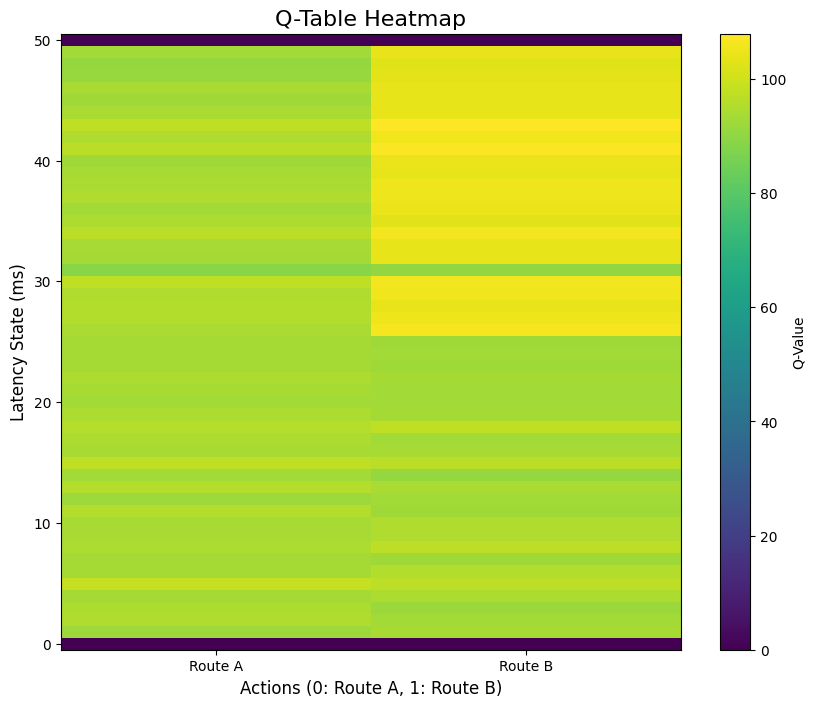

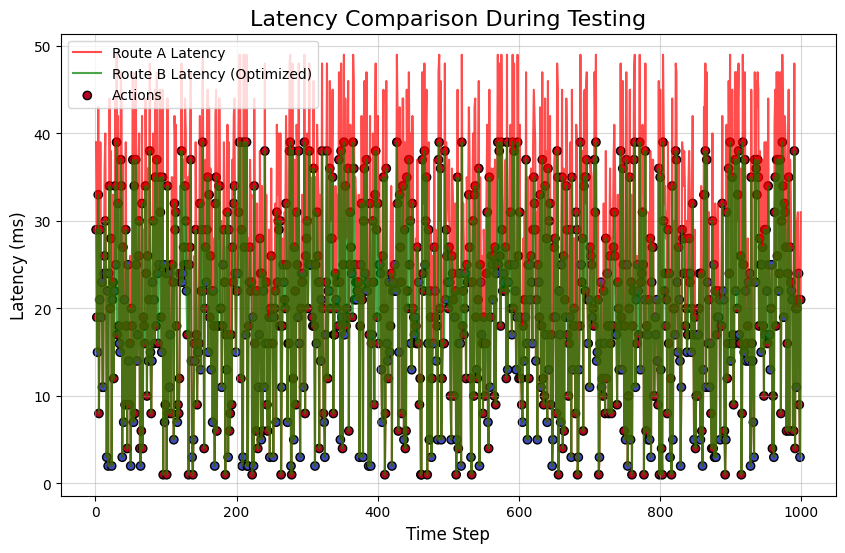

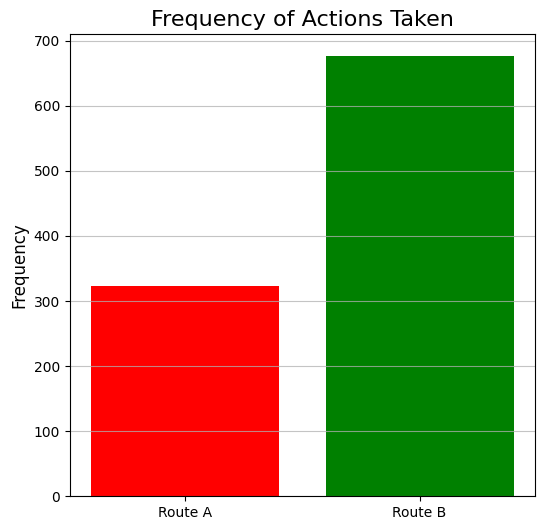

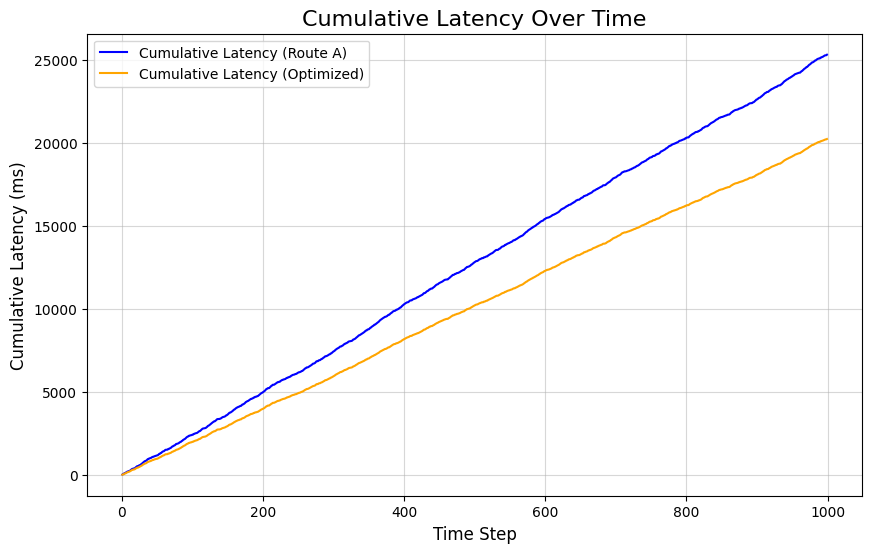

KeyboardInterrupt: 

In [ ]:
# Generate visualizations for the Latency Optimization Environment and Q-Learning results

# Initialize environment and train Q-learning model
env = LatencyOptimizationEnv()
q_table = q_learning(env, episodes=1000)

# Visualizations
# 1. Q-Table Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(q_table, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label="Q-Value")
plt.title("Q-Table Heatmap", fontsize=16)
plt.xlabel("Actions (0: Route A, 1: Route B)", fontsize=12)
plt.ylabel("Latency State (ms)", fontsize=12)
plt.xticks([0, 1], labels=["Route A", "Route B"])
plt.show()

# 2. Latency Comparison During Testing
state = env.reset()
done = False
steps = []
latency_a = []
latency_b = []
actions_taken = []

while not done:
    state_idx = state[0]
    action = np.argmax(q_table[state_idx])
    latency_a.append(state_idx)
    latency_b.append(state_idx - 10 if state_idx > 25 and action == 1 else state_idx)
    actions_taken.append(action)
    state, reward, done, _ = env.step(action)
    steps.append(env.current_step)

plt.figure(figsize=(10, 6))
plt.plot(steps, latency_a, label="Route A Latency", color='red', alpha=0.7)
plt.plot(steps, latency_b, label="Route B Latency (Optimized)", color='green', alpha=0.7)
plt.scatter(steps, latency_b, c=actions_taken, cmap="coolwarm", label="Actions", edgecolor="black")
plt.title("Latency Comparison During Testing", fontsize=16)
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Latency (ms)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# 3. Action Frequency Distribution
actions_taken_np = np.array(actions_taken)
plt.figure(figsize=(6, 6))
plt.bar(["Route A", "Route B"], [np.sum(actions_taken_np == 0), np.sum(actions_taken_np == 1)], color=['red', 'green'])
plt.title("Frequency of Actions Taken", fontsize=16)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# 4. Cumulative Latency Reduction
cumulative_original_latency = np.cumsum(latency_a)
cumulative_optimized_latency = np.cumsum(latency_b)

plt.figure(figsize=(10, 6))
plt.plot(steps, cumulative_original_latency, label="Cumulative Latency (Route A)", color='blue')
plt.plot(steps, cumulative_optimized_latency, label="Cumulative Latency (Optimized)", color='orange')
plt.title("Cumulative Latency Over Time", fontsize=16)
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Cumulative Latency (ms)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# 5. Rewards Per Episode During Training
# Simulating reward tracking during training
episodes = 1000
rewards_per_episode = []
epsilon_decay = 0.995
epsilon = 1.0

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        state_idx = state[0]
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state_idx])
        _, reward, done, _ = env.step(action)
        total_reward += reward
        state = env.reset()
    rewards_per_episode.append(total_reward)
    epsilon *= epsilon_decay

plt.figure(figsize=(10, 6))
plt.plot(range(episodes), rewards_per_episode, color='purple')
plt.title("Rewards Per Episode During Training", fontsize=16)
plt.xlabel("Episode", fontsize=12)
plt.ylabel("Total Reward", fontsize=12)
plt.grid(alpha=0.5)
plt.show()
